# Car Stock: Project Overview

To analyze the stock performance of Tesla, Ford, Honda, Volkswagen, Toyota and Honda from 2020 to today's date.

<br>

## Code and Resources Used

**Python Version:** Python 3.9.7

**Packages:** pandas_datareader, pandas, datetime, matplotlib, mplfinance

**Stock Alert:** [https://www.youtube.com/watch?v=d2kXmWzfS0w](https://www.youtube.com/watch?v=d2kXmWzfS0w)

**Candlestick Chart:** [https://coderzcolumn.com/tutorials/data-science/candlestick-chart-in-python-mplfinance-plotly-bokeh](https://coderzcolumn.com/tutorials/data-science/candlestick-chart-in-python-mplfinance-plotly-bokeh)

In [1]:
import pandas_datareader.data as web
import pandas as pd
from pandas.plotting import scatter_matrix
import datetime as dt 
from datetime import date
import matplotlib.pyplot as plt
import mplfinance as mpf

## Webscraping

For this task I'll use a for-loop to iterate through my list of stock tickers 

into the DataReader function. The date will be from Jan.9, 2020 to the current date (Oct.23, 2021).

The result will be a data frame for each iteration. 

After the loop, we get the following columns:

* High
* Low
* Open
* Close Volume
* Adj Close


In [2]:
start = dt.datetime(2020,1,9)
end = date.today().isoformat()
tickers = ['TSLA', 'F', 'VWAGY', 'TM', 'HMC']

In [3]:
#Grab historical data for each ticker; High, Low, Open, Close, Volume, Adj Close
for i in tickers:
    vars()[i] = web.DataReader(i, 'yahoo', start, end)

## Exploratory Data Analysis

For this analysis, I want to get the volatility of each stock as well

as the returns and cumulative returns.

Visualizations that I want to include:

* Adj Close over time
* Stock Volume
* Open over time with Moving Average
* Candlestick graph

### Adj Close Comparison

* Massive increase in Tesla stock price
* Ford, Volkswagen, Toyota, Honda: stagnant Adj Close, low volatility
* From this period, Tesla is dominating in terms of stock price

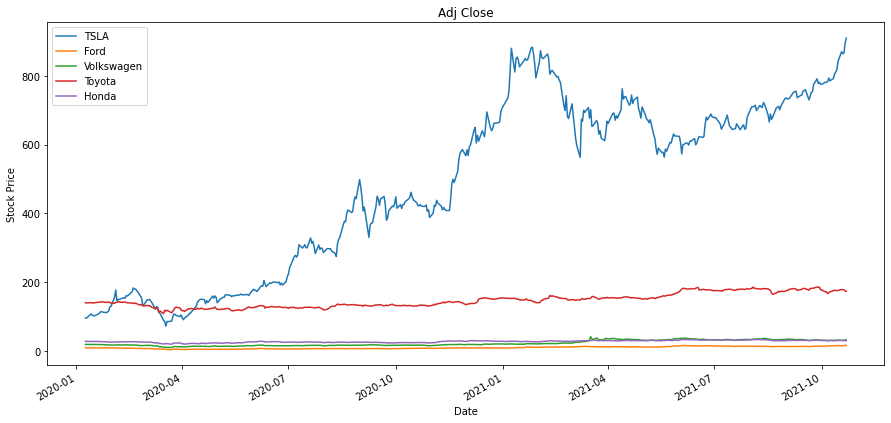

In [4]:
TSLA['Adj Close'].plot(label = 'TSLA', figsize = (15, 7))
F['Adj Close'].plot(label = 'Ford')
VWAGY['Adj Close'].plot(label = 'Volkswagen')
TM['Adj Close'].plot(label = 'Toyota')
HMC['Adj Close'].plot(label = 'Honda')

plt.legend()
plt.title('Adj Close')
plt.ylabel('Stock Price')
plt.show()

### Stock Volume Comparison

* Tesla and Ford: high volatility in stock volume
* Volkswagen, Toyota, Honda: low volatility in stock volume

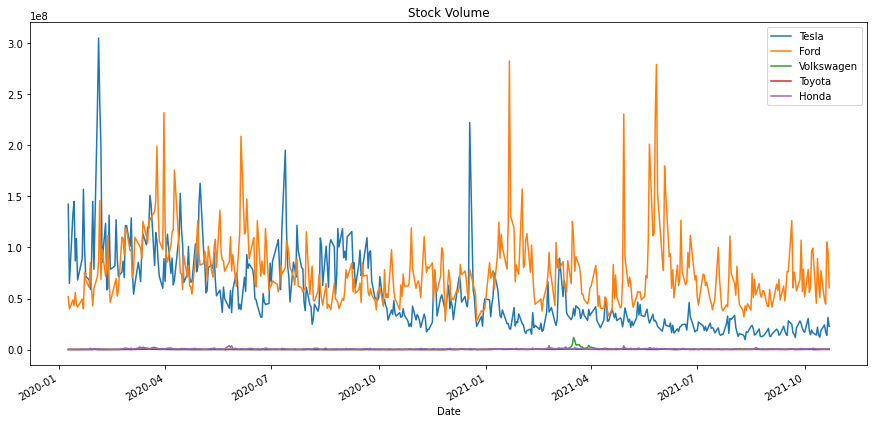

In [5]:
TSLA['Volume'].plot(label = 'Tesla', figsize = (15, 7))
F['Volume'].plot(label = 'Ford')
VWAGY['Volume'].plot(label = 'Volkswagen')
TM['Volume'].plot(label = 'Toyota')
HMC['Volume'].plot(label = 'Honda')

plt.title('Stock Volume')
plt.legend()
plt.show()

### Total Amount Traded

* Tesla shows spikes in stock trades; note Jan.18, 2020
* [https://www.cnbc.com/2020/12/18/tesla-jumps-6percent-in-heavy-volume-sees-wild-trading-volume-more-than-130-billion-worth-of-stock-changes-hands-ahead-of-sp-add.html](https://www.cnbc.com/2020/12/18/tesla-jumps-6percent-in-heavy-volume-sees-wild-trading-volume-more-than-130-billion-worth-of-stock-changes-hands-ahead-of-sp-add.html)
* In comparison, Volkswagen, Toyota and Honda show low trade movement this period
* Ford shows some spikes in stock movement in the months of Feb and July

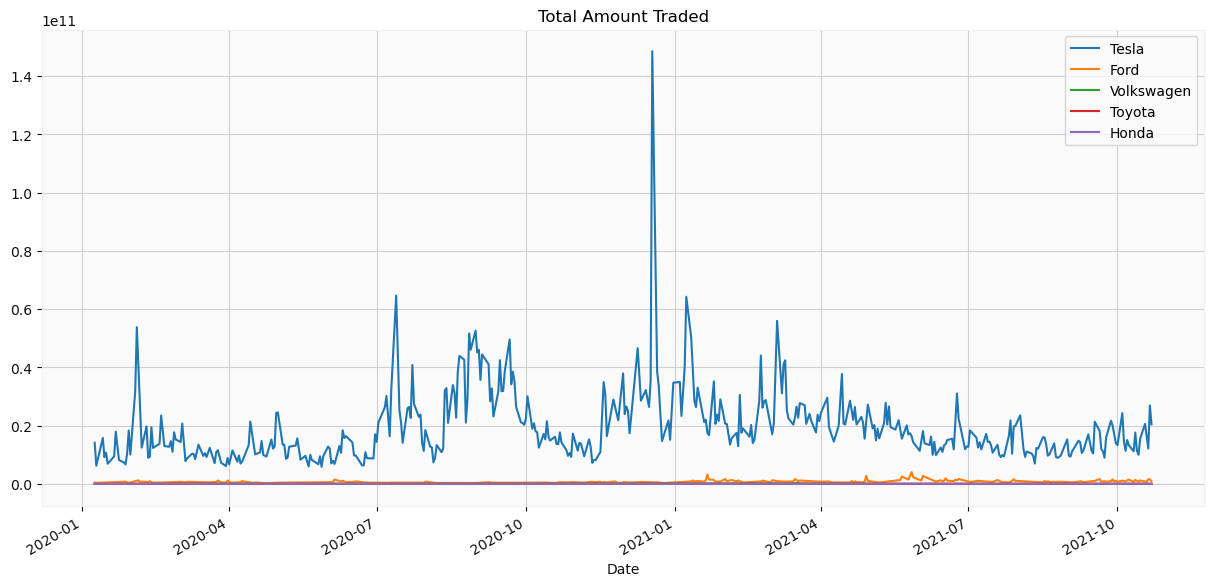

High                  6.950000e+02
Low                   6.285400e+02
Open                  6.689000e+02
Close                 6.950000e+02
Volume                2.221262e+08
Adj Close             6.950000e+02
Total Traded          1.485802e+11
MA50                  4.956962e+02
Returns               5.961271e-02
Cumulative Returns    7.219429e+00
Name: 2020-12-18 00:00:00, dtype: float64

In [25]:
TSLA['Total Traded'] = TSLA['Open'] * TSLA['Volume']
F['Total Traded'] = F['Open'] * F['Volume']
VWAGY['Total Traded'] = VWAGY['Open'] * VWAGY['Volume']
TM['Total Traded'] = TM['Open'] * TM['Volume']
HMC['Total Traded'] = HMC['Open'] * HMC['Volume']

TSLA['Total Traded'].plot(label = 'Tesla', figsize = (15, 7))
F['Total Traded'].plot(label = 'Ford')
VWAGY['Total Traded'].plot(label = 'Volkswagen')
TM['Total Traded'].plot(label = 'Toyota')
HMC['Total Traded'].plot(label = 'Honda')

plt.title('Total Amount Traded')
plt.legend()
plt.show()

#Tesla dominates in terms of total amount traded
#Let's focus in on that big spike before 2021-01
TSLA.iloc[TSLA['Total Traded'].argmax()]

In [7]:
#Percentage change of closing price for Tesla
percentage_change_TSLA = TSLA['Close'].pct_change()
last_change_TSLA = round(percentage_change_TSLA[-1],4)

#If there is a percentage change for Tesla of 4%, give an alert
if abs(last_change_TSLA) > 0.0004:
    print("Tesla Alert:" + str(last_change_TSLA))

Tesla Alert:0.0175


### Moving Averages

A good stock alert to have is when the moving average is below the opening price

by x amount, "Buy buy buy!".

When the moving average is above the opening price by x amount,

"Sell sell sell!".

Tesla Alert: MA < Open by at least 50


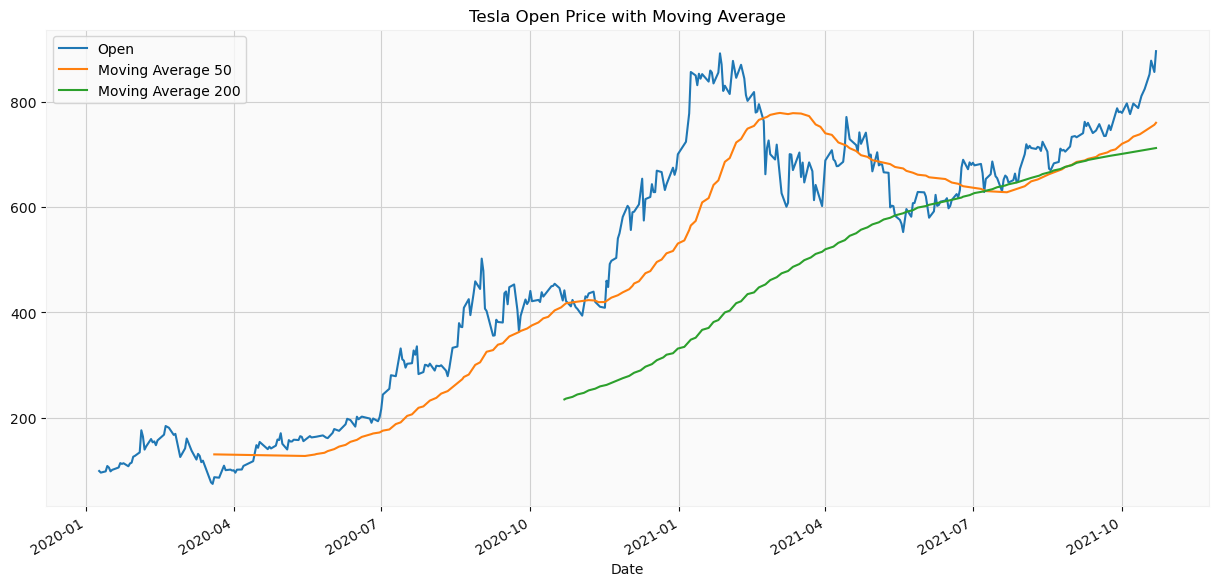

In [28]:
#Let's implement moving averages and see it how it compares to the open price
TSLA['Open'].plot(figsize = (15,7))
TSLA['MA50'] = TSLA['Open'].rolling(50).mean()
TSLA['MA50'].plot(label = 'Moving Average 50')

TSLA['MA200']=TSLA['Open'].rolling(200).mean()
TSLA['MA200'].plot(label = 'Moving Average 200')

plt.title("Tesla Open Price with Moving Average")
plt.legend()

TSLA_MA_Open = TSLA['MA50'][-1] - TSLA['Open'][-1]
if abs(TSLA_MA_Open) >= 50:
    if TSLA_MA_Open <= -50:
        print("Tesla Alert: MA < Open by at least 50")
    elif TSLA_MA_Open >= 50:
        print("Tesla Alert: MA > Open by at least 50")


### Correlation Matrix

* Strong Positive correlation between Ford, Volkswagen, Toyota, Honda
* Tesla has a nonlinear correlation with the other auto stocks

In [29]:
car_comp = pd.concat([TSLA['Open'], F['Open'], VWAGY['Open'], TM['Open'], HMC['Open']], axis = 1)
car_comp.columns = ('Tesla Open', 'Ford Open', 'Volkswagen Open', 'Toyota Open', 'Honda Open')

array([[<AxesSubplot:xlabel='Tesla Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='Volkswagen Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='Toyota Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='Honda Open', ylabel='Tesla Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='Volkswagen Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='Toyota Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='Honda Open', ylabel='Ford Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='Volkswagen Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Volkswagen Open'>,
        <AxesSubplot:xlabel='Volkswagen Open', ylabel='Volkswagen Open'>,
        <AxesSubplot:xlabel='Toyota Open', ylabel='Volkswagen Open'>,
        <AxesSubplot:xlabel='Honda Open', ylabel='Volkswagen Open'>],
  

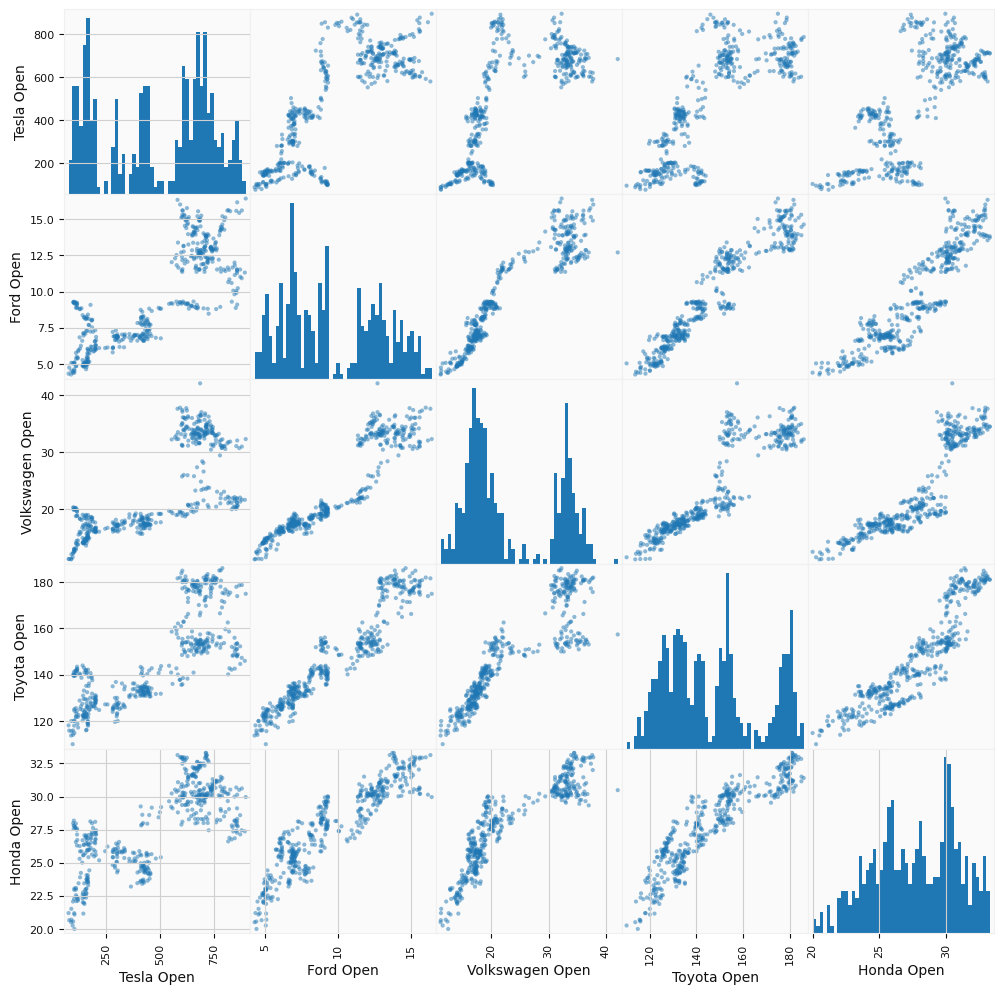

In [31]:
scatter_matrix(car_comp, figsize = (12,12), hist_kwds = {'bins': 50})

### Candlestick: Tesla

* For the first half of 2021, Tesla is under performing
* Large dips in March and April

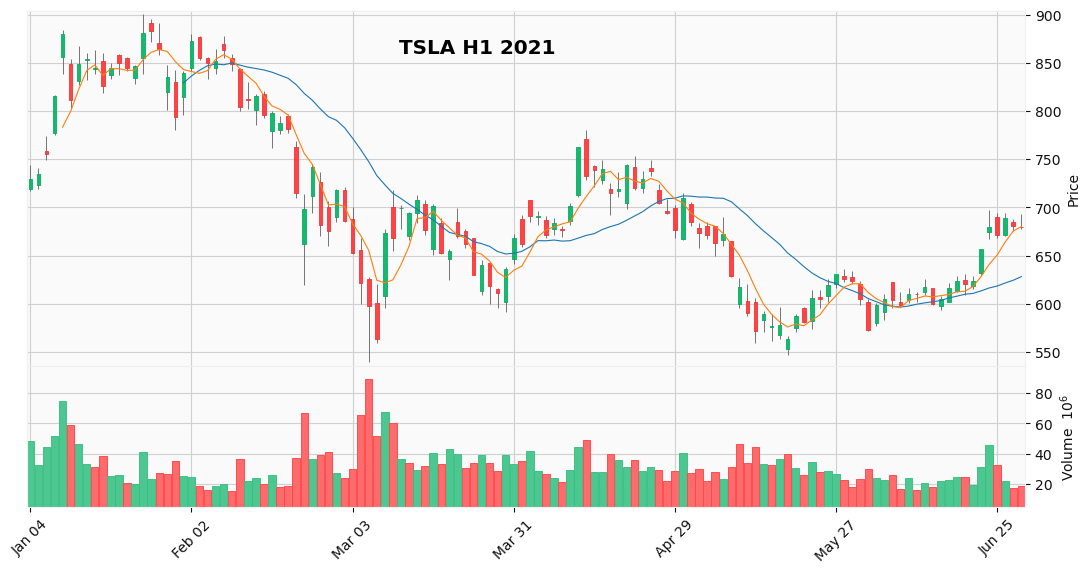

In [13]:
mpf.plot(TSLA['2021-01': '2021-6'], type = 'candle', 
        volume = True, mav =  (20, 5), title = 'TSLA H1 2021',
        tight_layout = True, figratio = (10,5), style = 'yahoo')

In [34]:
#Volatility of Daily Percent Change
# r = (p/p of previous day) - 1

TSLA['Returns'] = (TSLA['Close'] / TSLA['Close'].shift(1)) - 1
F['Returns'] = (F['Close'] / F['Close'].shift(1)) - 1
VWAGY['Returns'] = (VWAGY['Close'] / VWAGY['Close'].shift(1)) - 1
TM['Returns'] = (TM['Close'] / TM['Close'].shift(1)) - 1
HMC['Returns'] = (HMC['Close'] / HMC['Close'].shift(1)) - 1

TSLA.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,Returns,Cumulative Returns,MA200
Date,,,,,,,,,,,
2020-01-09,99.760002,94.573997,99.419998,96.267998,142202000.0,96.267998,1.413772e+10,NaN,NaN,NaN,NaN
2020-01-10,96.987999,94.739998,96.358002,95.629997,64797500.0,95.629997,6.243758e+09,NaN,-0.006627,0.993373,NaN
2020-01-13,105.125999,98.400002,98.699997,104.972000,132588000.0,104.972000,1.308644e+10,NaN,0.097689,1.090414,NaN
2020-01-14,109.482002,104.980003,108.851997,107.584000,144981000.0,107.584000,1.578147e+10,NaN,0.024883,1.117547,NaN
2020-01-15,107.568001,103.358002,105.952003,103.699997,86844000.0,103.699997,9.201296e+09,NaN,-0.036102,1.077201,NaN


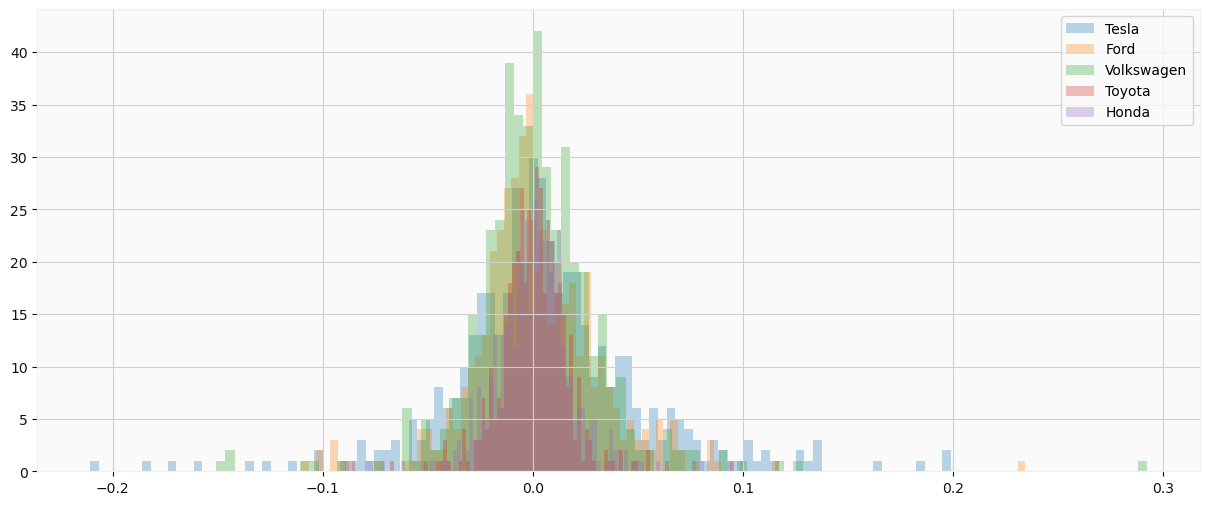

In [36]:
TSLA['Returns'].hist(bins = 100, label = 'Tesla', alpha = 0.3, figsize = (15,6))
F['Returns'].hist(bins = 100, label = 'Ford', alpha = 0.3)
VWAGY['Returns'].hist(bins = 100, label = 'Volkswagen', alpha = 0.3)
TM['Returns'].hist(bins = 100, label = 'Toyota', alpha = 0.3)
HMC['Returns'].hist(bins = 100, label = 'Honda', alpha = 0.3)
plt.legend()
#Keep in mind that this is not normalized

### Density Plot

* Toyota and Honda stocks look very stable in returns
* Volkswagen and Ford are more volatile in returns
* For auto stocks, Tesla is the most volatile stock for returns

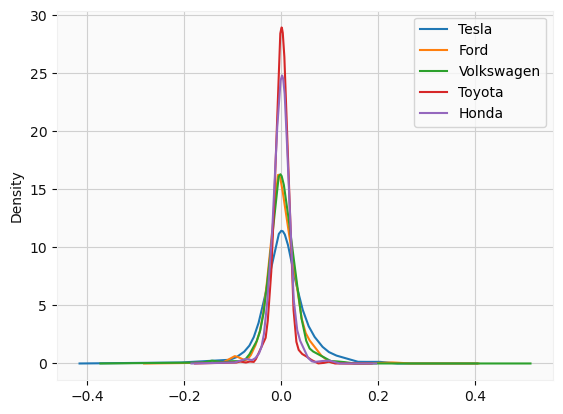

In [37]:
#Kernel Density Estimation to find the fit of the hist
TSLA['Returns'].plot(kind = 'kde', label = 'Tesla')
F['Returns'].plot(kind = 'kde', label = 'Ford')
VWAGY['Returns'].plot(kind = 'kde', label = 'Volkswagen')
TM['Returns'].plot(kind = 'kde', label = 'Toyota')
HMC['Returns'].plot(kind = 'kde', label = 'Honda')
plt.legend()

### Box Plot

* We see some outliers in returns that we wouldn't normally see for Ford and Volkswagen

<AxesSubplot:>

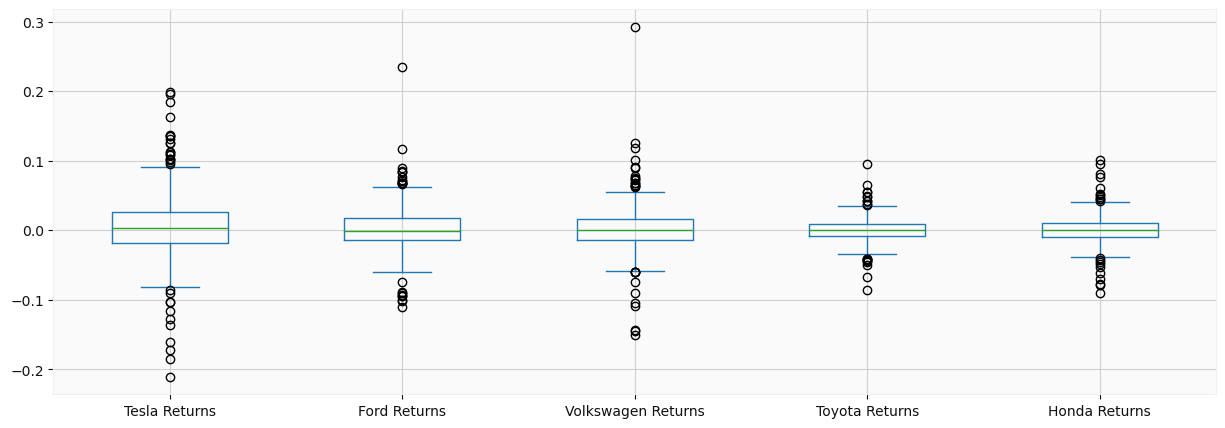

In [41]:
box_df = pd.concat([TSLA['Returns'], F['Returns'], VWAGY['Returns'], TM['Returns'], HMC['Returns']], axis = 1)
box_df.columns = ['Tesla Returns', 'Ford Returns', 'Volkswagen Returns', 'Toyota Returns', 'Honda Returns']
box_df.plot(kind = 'box', figsize = (15,5))

### Scatter Plot Matrix

* Honda and Toyota have a strong positive correlation
* Ford is more correlated to Volkswagen than to Honda or Toyota

array([[<AxesSubplot:xlabel='Tesla Returns', ylabel='Tesla Returns'>,
        <AxesSubplot:xlabel='Ford Returns', ylabel='Tesla Returns'>,
        <AxesSubplot:xlabel='Volkswagen Returns', ylabel='Tesla Returns'>,
        <AxesSubplot:xlabel='Toyota Returns', ylabel='Tesla Returns'>,
        <AxesSubplot:xlabel='Honda Returns', ylabel='Tesla Returns'>],
       [<AxesSubplot:xlabel='Tesla Returns', ylabel='Ford Returns'>,
        <AxesSubplot:xlabel='Ford Returns', ylabel='Ford Returns'>,
        <AxesSubplot:xlabel='Volkswagen Returns', ylabel='Ford Returns'>,
        <AxesSubplot:xlabel='Toyota Returns', ylabel='Ford Returns'>,
        <AxesSubplot:xlabel='Honda Returns', ylabel='Ford Returns'>],
       [<AxesSubplot:xlabel='Tesla Returns', ylabel='Volkswagen Returns'>,
        <AxesSubplot:xlabel='Ford Returns', ylabel='Volkswagen Returns'>,
        <AxesSubplot:xlabel='Volkswagen Returns', ylabel='Volkswagen Returns'>,
        <AxesSubplot:xlabel='Toyota Returns', ylabel='Volkswagen

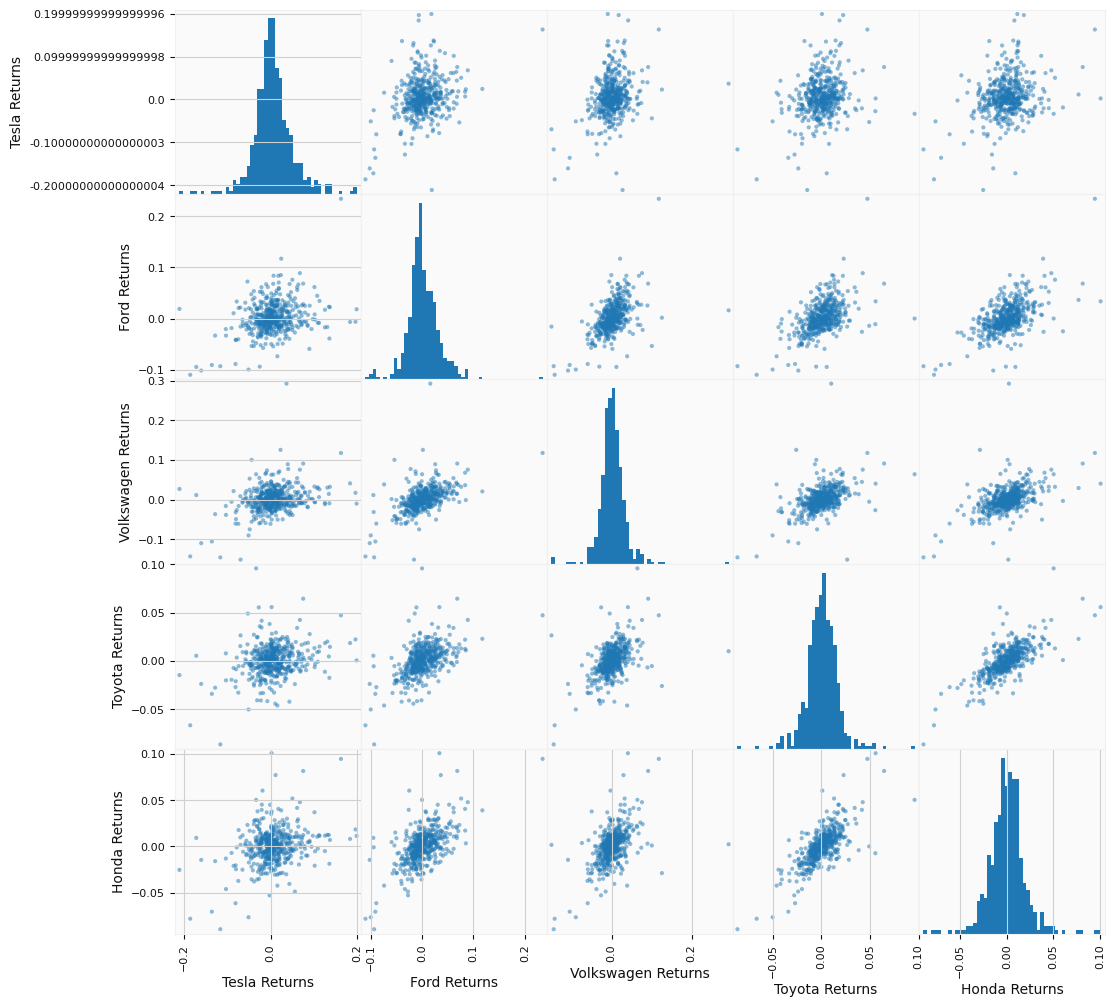

In [43]:
scatter_matrix(box_df, figsize = (12,12), hist_kwds = {'bins': 50}, alpha = 0.5)
#Once again we see that Tesla has no correlation to Ford and Toyota

### Cumulative Returns

* Tesla shows the highest cumulative return
  * If you had invest $1 into Tesla at 2020-01, it would be worth ~ $8 at 2021-10
* Ford and Volkswagen have low returns
  * You would have to buy a high volume to make some decent returns
* Toyota and Honda have unclear returns
  * You are losing money in this period

In [45]:
#Cumulative Return - does not take into account dividends
TSLA['Cumulative Returns'] = (1 + TSLA['Returns']).cumprod()
F['Cumulative Returns'] = (1 + F['Returns']).cumprod()
VWAGY['Cumulative Returns'] = (1 + VWAGY['Returns']).cumprod()
TM['Cumulative Returns'] = (1 + TM['Returns']).cumprod()
HMC['Cumulative Returns'] = (1 + HMC['Returns']).cumprod()
TSLA.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,Returns,Cumulative Returns,MA200
Date,,,,,,,,,,,
2020-01-09,99.760002,94.573997,99.419998,96.267998,142202000.0,96.267998,1.413772e+10,NaN,NaN,NaN,NaN
2020-01-10,96.987999,94.739998,96.358002,95.629997,64797500.0,95.629997,6.243758e+09,NaN,-0.006627,0.993373,NaN
2020-01-13,105.125999,98.400002,98.699997,104.972000,132588000.0,104.972000,1.308644e+10,NaN,0.097689,1.090414,NaN
2020-01-14,109.482002,104.980003,108.851997,107.584000,144981000.0,107.584000,1.578147e+10,NaN,0.024883,1.117547,NaN
2020-01-15,107.568001,103.358002,105.952003,103.699997,86844000.0,103.699997,9.201296e+09,NaN,-0.036102,1.077201,NaN


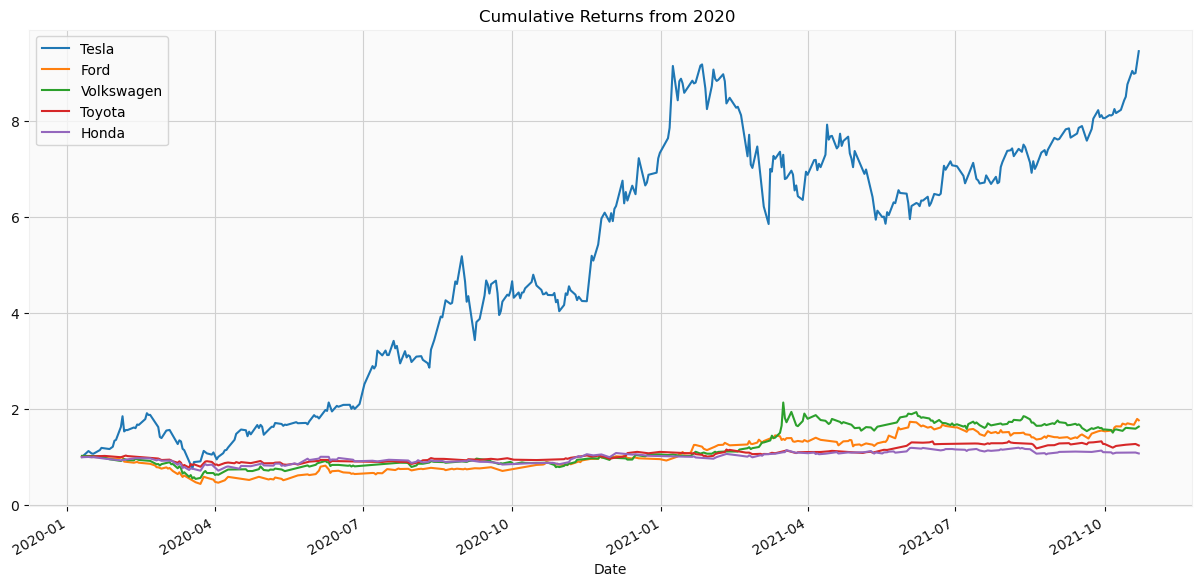

In [48]:
TSLA['Cumulative Returns'].plot(label = 'Tesla', figsize = (15,7))
F['Cumulative Returns'].plot(label = 'Ford')
VWAGY['Cumulative Returns'].plot(label = 'Volkswagen')
TM['Cumulative Returns'].plot(label = 'Toyota')
HMC['Cumulative Returns'].plot(label = 'Honda')

plt.title('Cumulative Returns from 2020 ')
plt.legend()